In [2]:
import pandas as pd

PIMA = pd.read_csv("../cv_data/diabetes.csv")
PIMA.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
PIMA = PIMA.astype("float")
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


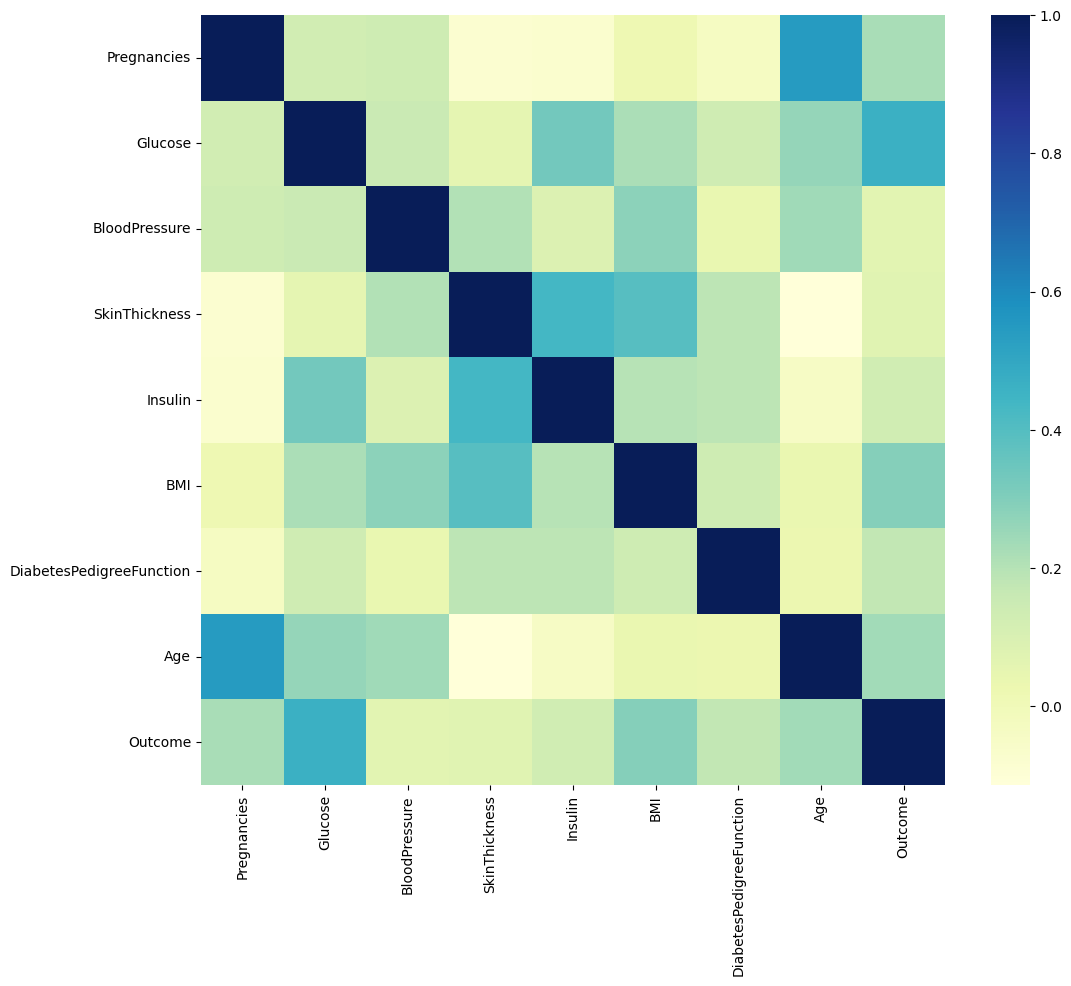

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12,10))
sns.heatmap(PIMA.corr(), cmap="YlGnBu")
plt.show()

In [14]:
zero_features = ["Glucose", "BloodPressure", "SkinThickness", "BMI"]
PIMA[zero_features] = PIMA[zero_features].replace(0, PIMA[zero_features].mean())
(PIMA==0).astype(int).sum()


Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split


X = PIMA.drop(["Outcome"], axis=1)
y = PIMA["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


estimators = [("scaler", StandardScaler()), ("clf", LogisticRegression(solver="liblinear", random_state=13))]

pipe_lr = Pipeline(estimators)
pipe_lr.fit(X_train, y_train)
pred = pipe_lr.predict(X_test)

In [17]:
from sklearn.metrics import (accuracy_score, recall_score, precision_score, roc_auc_score, f1_score)

print(accuracy_score(y_test, pred))
print(recall_score(y_test, pred))
print(precision_score(y_test, pred))
print(roc_auc_score(y_test, pred))
print(f1_score(y_test, pred))




0.7727272727272727
0.6111111111111112
0.7021276595744681
0.7355555555555556
0.6534653465346535


In [18]:
coeff = list(pipe_lr["clf"].coef_[0])
labels = list(X_train.columns)
coeff

[0.35426588844126494,
 1.2014244425037581,
 -0.1584013553628671,
 0.03394657712929955,
 -0.16286471953988121,
 0.6204045219895111,
 0.3666935579557874,
 0.17195965447035094]

In [19]:
features = pd.DataFrame({"Features":labels, "importance":coeff})
features.sort_values(by=["importance"], ascending=True, inplace=True)
features["positive"] = features["importance"] > 0

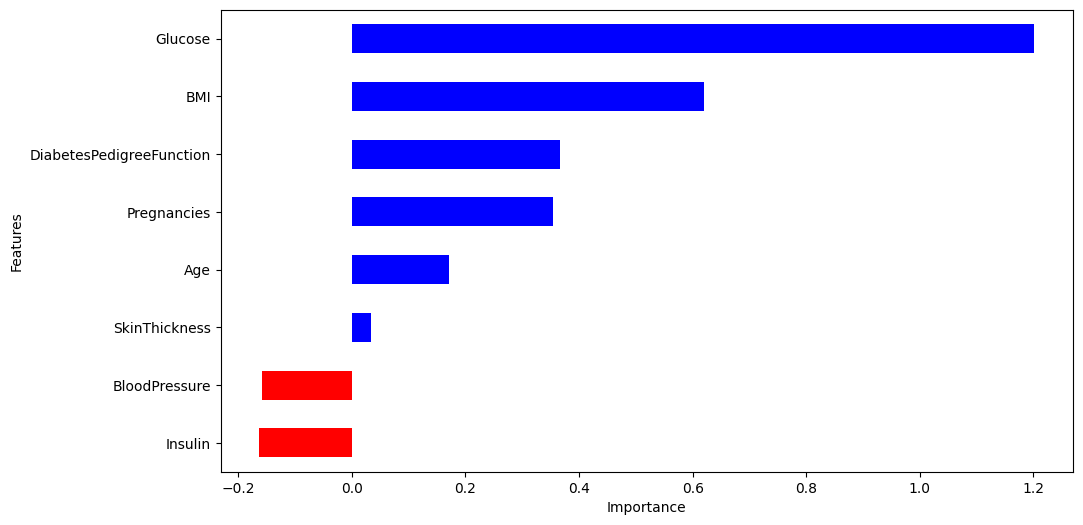

In [20]:
features.set_index("Features", inplace=True)
features["importance"].plot(kind="barh",
                            figsize=(11,6),
                            color=features["positive"].map({True:"blue",
                                                            False:"red"}))
plt.xlabel("Importance")
plt.show()